<a href="https://colab.research.google.com/github/arielle00/CMPE257-Fall23-Arielle-Shnayder/blob/homework2/hw2_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

dfTrain = np.loadtxt("ZipDigits.train",delimiter=" ",usecols=range(0, 257))

dfTest = np.loadtxt("ZipDigits.test",delimiter=" ",usecols=range(0, 257))

print("df train :",dfTrain.shape)
print("df test :", dfTest.shape)

filtered_dfTrain = []
filtered_dfTest = []

filtered_dfTrain = dfTrain[(dfTrain[:, 0] == 1) | (dfTrain[:, 0] == 5)]
filtered_dfTest = dfTest[(dfTest[:, 0] == 1) | (dfTest[:, 0] == 5)]

filtered_dfTrain[:, 0] = np.where(filtered_dfTrain[:, 0] == 1, 1, -1)
filtered_dfTest[:, 0] = np.where(filtered_dfTest[:, 0] == 1, 1, -1)

def intensity(image):
    pixels = image[1:]
    #print(pixels.shape)
    return np.mean(pixels)

def hor_symmetry(image):
    # 16 x 16 = 256
    image_2d = image[1:].reshape(16, 16)
    upper_half = image_2d[:8,:]
    lower_half = image_2d[8:,:]
    lower_half_flipped = np.flipud(lower_half)
    return np.mean(np.abs(upper_half - lower_half_flipped))

intensities = np.array([intensity(img) for img in filtered_dfTrain])
symmetries = np.array([hor_symmetry(img) for img in filtered_dfTrain])
labels = filtered_dfTrain[:, 0]

df_train = pd.DataFrame({'x0': 1, 'x1':intensities, 'x2':symmetries, 'y':labels})

intensities_test = np.array([intensity(img) for img in filtered_dfTest])
symmetries_test = np.array([hor_symmetry(img) for img in filtered_dfTest])
labels_test = filtered_dfTest[:, 0]


df train : (7291, 257)
df test : (2007, 257)


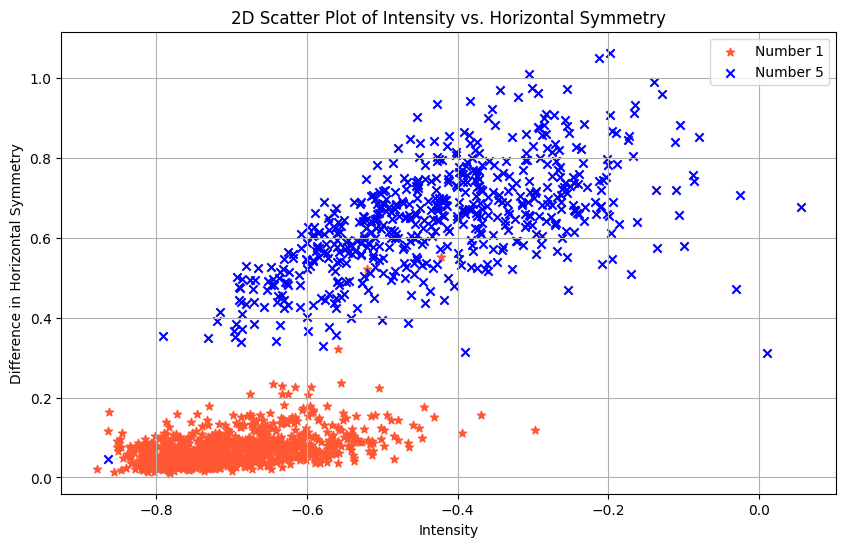

In [7]:
# Training data
plt.figure(figsize=(10, 6))
plt.scatter(intensities[labels==1], symmetries[labels==1], color = '#FF5733', marker='*', label='Number 1')
plt.scatter(intensities[labels==-1], symmetries[labels==-1], color = 'blue', marker='x', label='Number 5')

plt.xlabel("Intensity")
plt.ylabel("Difference in Horizontal Symmetry")
plt.title("2D Scatter Plot of Intensity vs. Horizontal Symmetry")
plt.legend()
plt.grid(True)
plt.show()

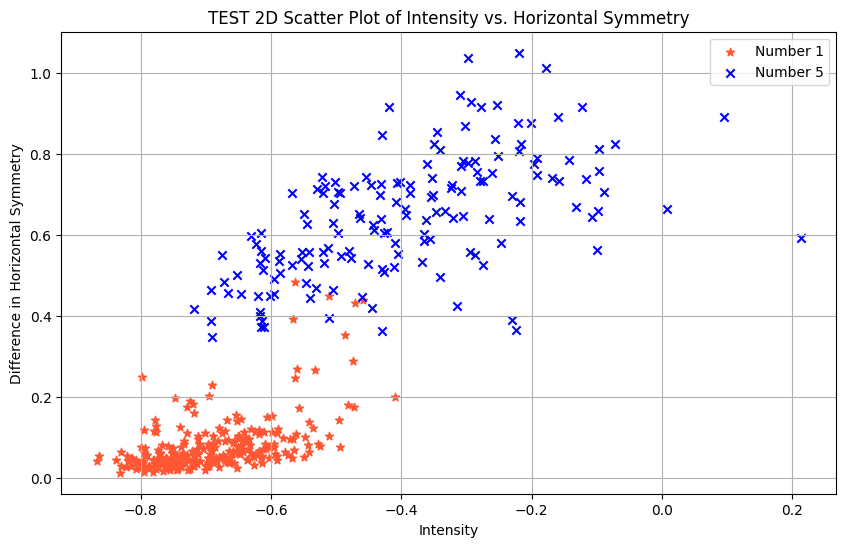

In [8]:
# Test data
plt.figure(figsize=(10, 6))
plt.scatter(intensities_test[labels_test==1], symmetries_test[labels_test==1], color = '#FF5733', marker='*', label='Number 1')
plt.scatter(intensities_test[labels_test==-1], symmetries_test[labels_test==-1], color = 'blue', marker='x', label='Number 5')

plt.xlabel("Intensity")
plt.ylabel("Difference in Horizontal Symmetry")
plt.title("TEST 2D Scatter Plot of Intensity vs. Horizontal Symmetry")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
def check_for_misclassified(w):
  misclassified = {}
  signs = np.sign(df_train.iloc[:, :3].values @ w)
  y = df_train.iloc[:, 3].values

  mismatches = np.where(signs != y)[0]
  for mismatch in mismatches:
      misclassified[mismatch] = signs[mismatch]
  return misclassified

PLA
This is how many iterations it takes: 1000
This is the final weight:  [ 4.          0.84620703 -6.21613281]


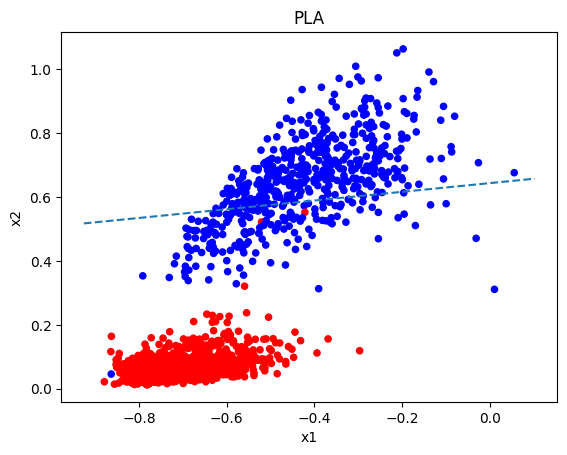

In [13]:
def plot_graph(w, msg):
  col = df_train['y'].map({-1:'b', 1:'r'})
  df_train.plot.scatter(x='x1', y='x2', c=col)
  axes = plt.gca()
  x_vals = np.array(axes.get_xlim())
  y_vals = np.array(axes.get_ylim())
  y_vals = -w[0]/w[2] - w[1]/w[2] * x_vals
  plt.title(msg)
  plt.plot(x_vals, y_vals, '--')


def perceptron():
  w = [0,0,0]
  misclassified = check_for_misclassified(w)
  i=0

  while(len(misclassified)!=0 and i<1000):
    list_of_misclass = random.choice(list(misclassified.keys()))
    x = df_train.iloc[list_of_misclass][:3].values
    y = df_train.iloc[list_of_misclass][3]

    w = w + x*y

    misclassified = check_for_misclassified(w)
    i=i+1
  print("PLA")
  print("This is how many iterations it takes:",i)
  print("This is the final weight: ",w)
  plot_graph(w, "PLA")

w = perceptron()

Pocket
Ein 0.031404868673926986
This is the final weight:  [ 0.         -0.45549609 -0.60044531]


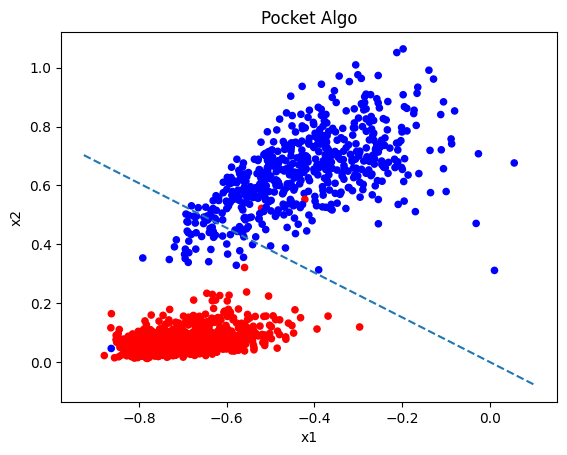

In [27]:
Ein_list = []

def pocketAlgo(misclassified_method, w_pocket):
  misclassified = misclassified_method(w_pocket)
  i=0
  # w_maybeNew = w_pocket
  while(len(misclassified)!=0 and i<1000):
      list_of_misclass = random.choice(list(misclassified))
      # print(len(misclassified))
      Ein = len(misclassified)/len(df_train)
      Ein_list.append(Ein)

      #list_of_misclass = list(misclassified.keys())[0]
      x = df_train.iloc[list_of_misclass][:3].values
      y = df_train.iloc[list_of_misclass][3]

      w_maybeNew = w_pocket + x*y

      misclassified_new = misclassified_method(w_maybeNew)

      if len(misclassified_new) <= len(misclassified):
          w_pocket = w_maybeNew.copy()
          misclassified = misclassified_new
          # misclassified = misclassified_new
      else:
          misclassified = misclassified_method(w_pocket)
      i=i+1
      # misclassified = misclassified_method(w_pocket)

  print("Pocket")
  print("Ein",np.mean(Ein_list))
  print("This is the final weight: ",w_pocket)

  plot_graph(w_pocket, "Pocket Algo")

# pocketAlgo()
w_pocket = [0,0,0]
pocketAlgo(check_for_misclassified, w_pocket)